In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [81]:
trainset = pd.read_csv("Dataset2_train.csv").dropna()
testset = pd.read_csv("Dataset2_test.csv").dropna()
wholeset = pd.concat([trainset, testset], axis=0).dropna()

trainset.shape  # (5907, 29)

(5907, 29)

In [82]:
trainset.shape  # 1477

(5907, 29)

In [83]:
X = wholeset[['Energy Consumption per Distance MJ/100km', 'CO2 Emissions(g/km)']]

In [84]:
X

,Energy Consumption per Distance MJ/100km,CO2 Emissions(g/km)
0,434.34,299.0
1,287.28,193.0
2,321.48,221.0
3,307.80,212.0
4,454.86,313.0
...,...,...
1472,342.00,235.0
1473,386.46,263.0
1474,506.16,346.0
1475,280.44,193.0


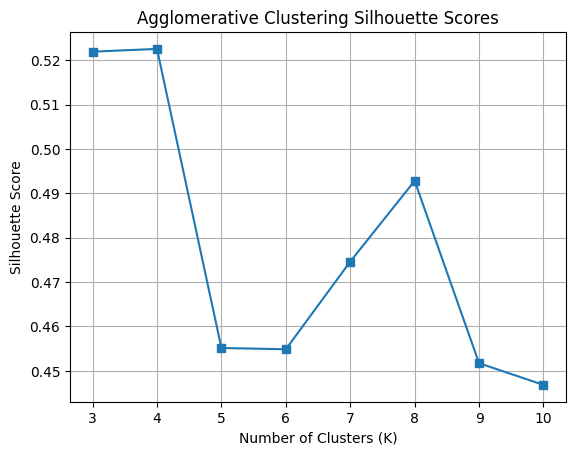

Optimal K for Agglomerative Clustering: 4


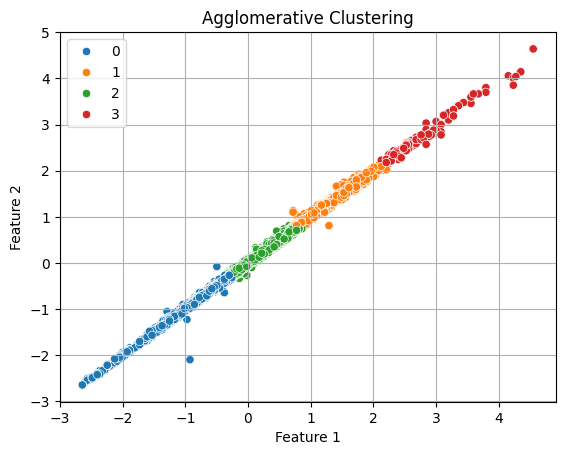

In [85]:
# Assuming X is the data you are clustering, make sure to scale it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7) Agglomerative Clustering
agg_sil_scores = []
k_values = range(3, 11)  # Define a range of K values to test
for k in k_values:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    agg_sil_scores.append(sil)

# Plot silhouette scores for different values of K
plt.plot(k_values, agg_sil_scores, marker='s')
plt.title("Agglomerative Clustering Silhouette Scores")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Determine the optimal K based on silhouette score
optimal_k_agg = k_values[np.argmax(agg_sil_scores)]
print("Optimal K for Agglomerative Clustering:", optimal_k_agg)

# Fit Agglomerative Clustering model with optimal K
agg_model = AgglomerativeClustering(n_clusters=optimal_k_agg)
agg_labels = agg_model.fit_predict(X_scaled)

# Add cluster labels to the dataframe
wholeset['Agglomerative_Cluster'] = agg_labels

# Visualize the clustering result with a scatterplot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='tab10')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")  # Change this according to your dataset's feature
plt.ylabel("Feature 2")  # Change this according to your dataset's feature
plt.grid(True)
plt.show()

In [86]:
wholeset.to_csv("Dataset_with_cluster_label.csv", index=False)

In [89]:
trainset = wholeset.iloc[0:5907, ]
testset = wholeset.iloc[5907:, ]

trainset.shape # (5907, 29)
testset.shape  # (1477, 30)

trainset.to_csv("Workstream_1_ML_models/Trainset_with_cluster_label.csv", index=False)
testset.to_csv("Workstream_1_ML_models/Testset_with_cluster_label.csv", index=False)

In [88]:
wholeset

,Engine Size(L),Cylinders,Gearbox_Type,Gearbox_Number,Energy Consumption per Distance MJ/100km,Model Features_Flexible-fuel vehicle,Model Features_Four-wheel drive,Model Features_Long wheelbase,Model Features_Short wheelbase,Vehicle Class_FULL-SIZE,...,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_E,Fuel Type_X,Fuel Type_Z,CO2 Emissions(g/km),Make,Agglomerative_Cluster
0,4.0,6.0,1.0,5.000000,434.34,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,299.0,NISSAN,1
1,2.4,4.0,1.0,6.000000,287.28,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,193.0,HYUNDAI,0
2,2.0,4.0,1.0,8.000000,321.48,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,221.0,BMW,0
3,2.5,4.0,1.0,6.000000,307.80,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,TOYOTA,0
4,5.0,8.0,1.0,8.000000,454.86,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,313.0,JAGUAR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2.0,4.0,1.0,6.854093,342.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,235.0,JEEP,0
1473,2.5,4.0,1.0,6.000000,386.46,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,263.0,GMC,2
1474,5.7,8.0,1.0,6.000000,506.16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,346.0,RAM,1
1475,2.0,4.0,0.0,7.000000,280.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,193.0,MERCEDES-BENZ,0
